# `20190329a` dual smas

In [1]:
from pyUn0 import *

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

Not loading RPi.GPIO as not on RPi


### Exploring FFT and different spectral components

Data acquired


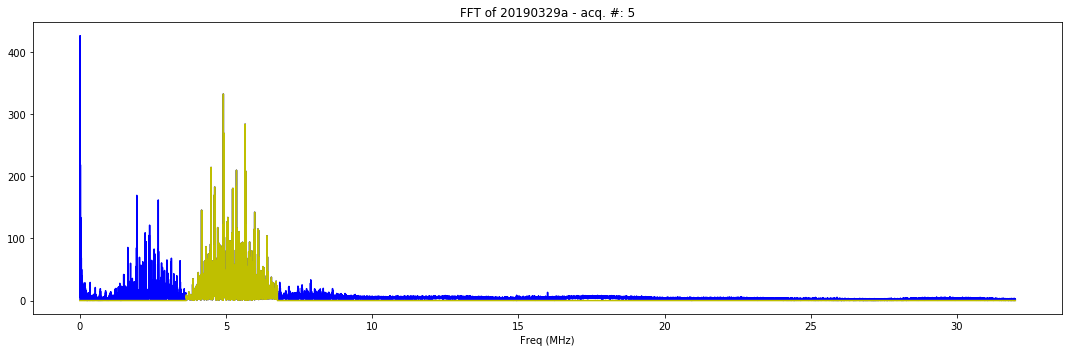

Data acquired


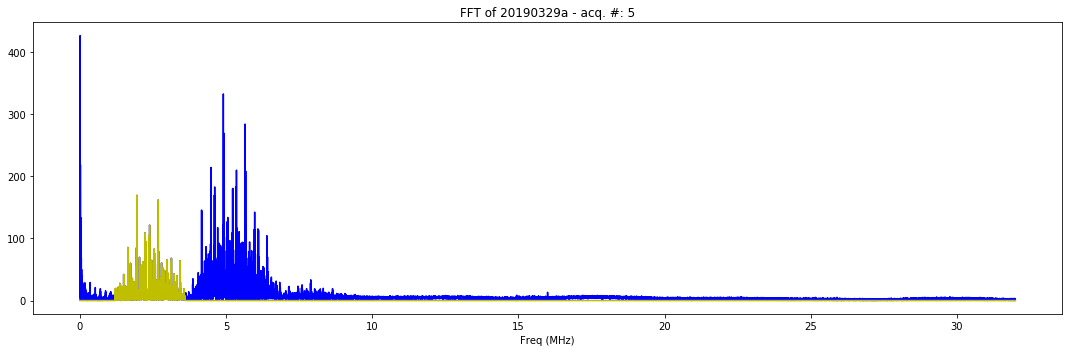

Data acquired


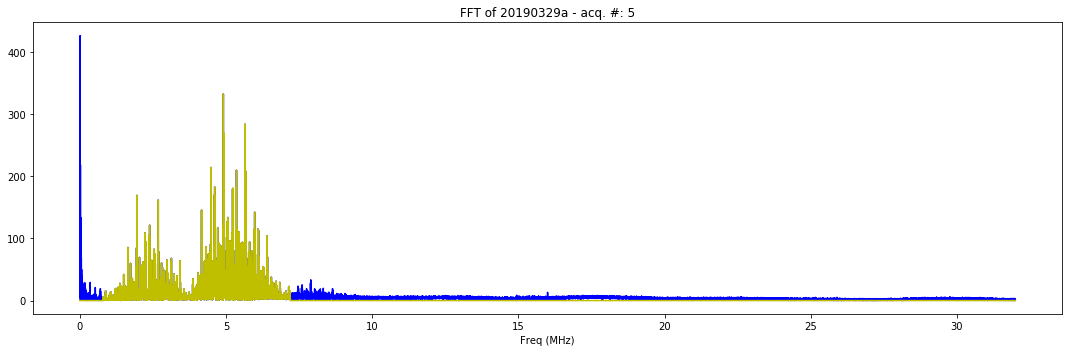

In [2]:
y = us_json()
y.fPiezo = 5.2
y.Bandwidth = 0.60
y.JSONprocessing("./data/20190329a-5.json")
y.create_fft() 

x = us_json()
x.fPiezo = 4.8/2.0
x.Bandwidth = 1.0
x.JSONprocessing("./data/20190329a-5.json")
x.create_fft() 

z = us_json()
z.fPiezo = 4
z.Bandwidth = 1.6
z.JSONprocessing("./data/20190329a-5.json")
z.create_fft() 

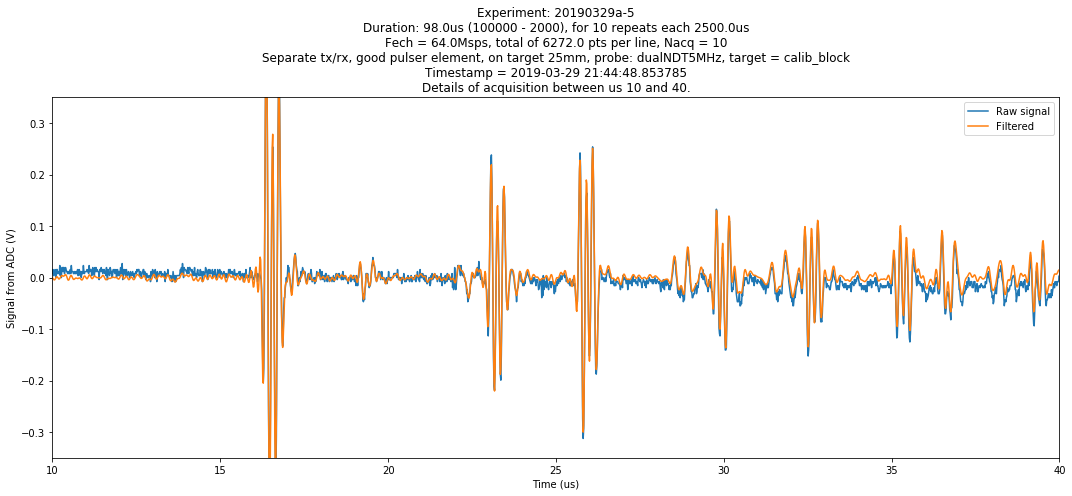

In [29]:
fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
minT,maxT=10, 40
ax.plot(y.t,y.tmp,label="Raw signal")
ax.plot(z.t,z.filtered_signal,label = "Filtered")
ax.set_xlim(minT,maxT)
ax.set_ylim(-0.35, 0.35)
ax.legend()

DESC = z.create_title_text()+"\nDetails of acquisition between us "+str(minT)+" and "+ str(maxT)+"."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/details_"+str(minT)+"-"+str(maxT)+"_"+z.iD+"-"+str(z.N)+".jpg"
plt.savefig(file_name)
tag_image(file_name,"matty,dualNDT5MHz", "20190329a", "graph", DESC)

plt.show()

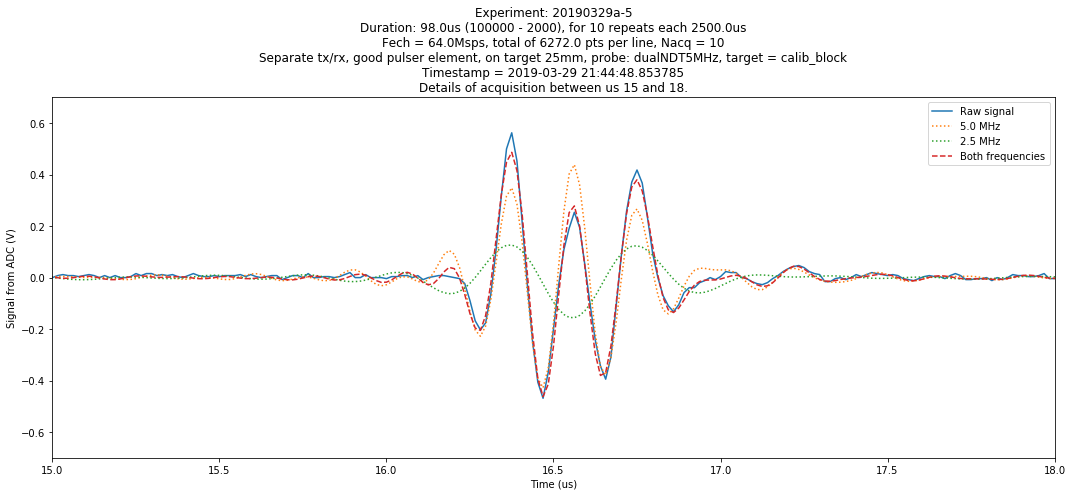

In [24]:
fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
minT,maxT=15, 18
ax.plot(y.t,y.tmp,label="Raw signal")
ax.plot(y.t,y.filtered_signal,label = "5.0 MHz",linestyle=":")
ax.plot(x.t,x.filtered_signal,label = "2.5 MHz",linestyle=":")
ax.plot(z.t,z.filtered_signal,label = "Both frequencies",linestyle="--")
ax.set_xlim(minT,maxT)
ax.set_ylim(-0.7, 0.7)
ax.legend()
DESC = z.create_title_text()+"\nDetails of acquisition between us "+str(minT)+" and "+ str(maxT)+"."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/details_"+str(minT)+"-"+str(maxT)+"_"+z.iD+"-"+str(z.N)+".jpg"

plt.savefig(file_name)
tag_image(file_name,"matty,dualNDT5MHz", "20190329a", "graph", DESC)
plt.show()

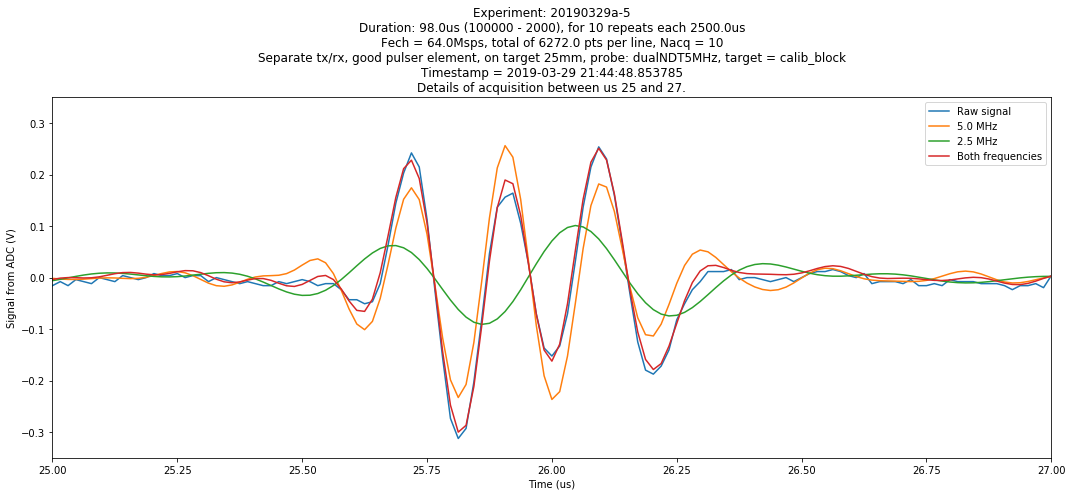

In [25]:
fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
minT,maxT = 25,27
ax.plot(y.t,y.tmp,label="Raw signal")
ax.plot(y.t,y.filtered_signal,label = "5.0 MHz")
ax.plot(x.t,x.filtered_signal,label = "2.5 MHz")
ax.plot(z.t,z.filtered_signal,label = "Both frequencies")
ax.set_xlim(minT,maxT)
ax.set_ylim(-0.35, 0.35)
ax.legend()
DESC = z.create_title_text()+"\nDetails of acquisition between us "+str(minT)+" and "+ str(maxT)+"."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/details_"+str(minT)+"-"+str(maxT)+"_"+z.iD+"-"+str(z.N)+".jpg"
plt.savefig(file_name)
tag_image(file_name,"matty,dualNDT5MHz", "20190329a", "graph", DESC)

plt.show()

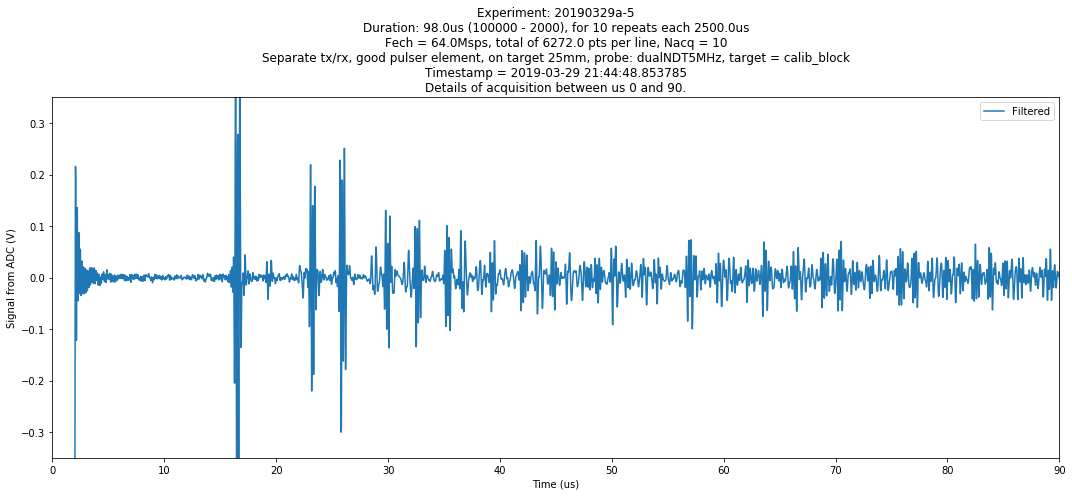

In [26]:
fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
minT,maxT=0, 90
#ax.plot(y.t,y.tmp,label="Raw signal")
ax.plot(z.t,z.filtered_signal,label = "Filtered")
ax.set_xlim(minT,maxT)
ax.set_ylim(-0.35, 0.35)
ax.legend()

DESC = z.create_title_text()+"\nDetails of acquisition between us "+str(minT)+" and "+ str(maxT)+"."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/details_"+str(minT)+"-"+str(maxT)+"_"+z.iD+"-"+str(z.N)+".jpg"
plt.savefig(file_name)    
tag_image(file_name,"matty,dualNDT5MHz", "20190329a", "signal", DESC)

plt.show()

## Using all lines

6272 10


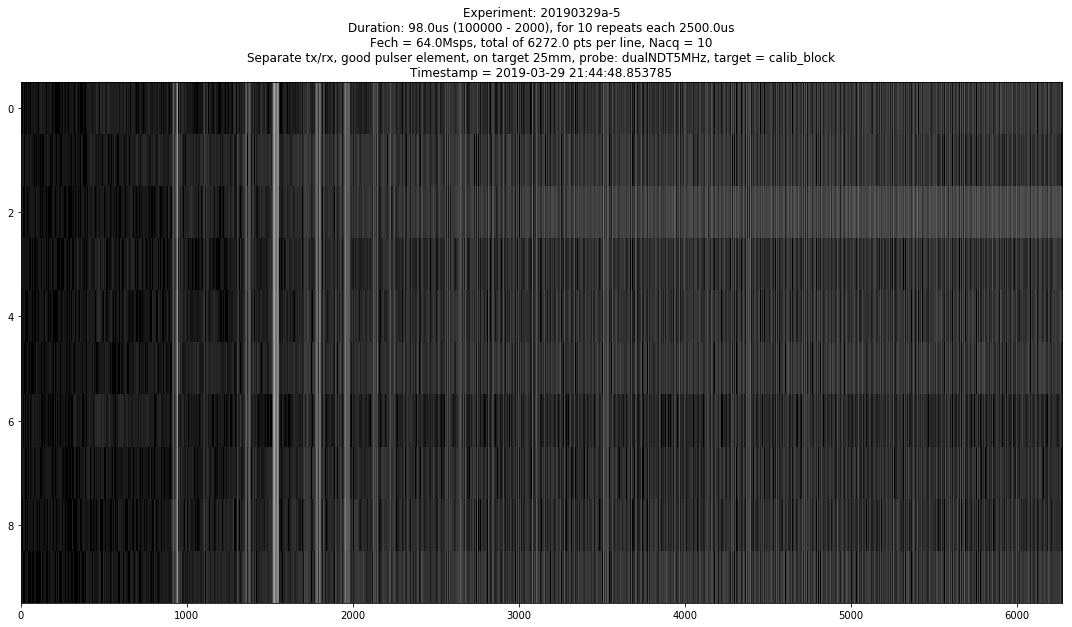

In [27]:
clean_image = z.mk2DArray()

((10, 6272), (6272,))


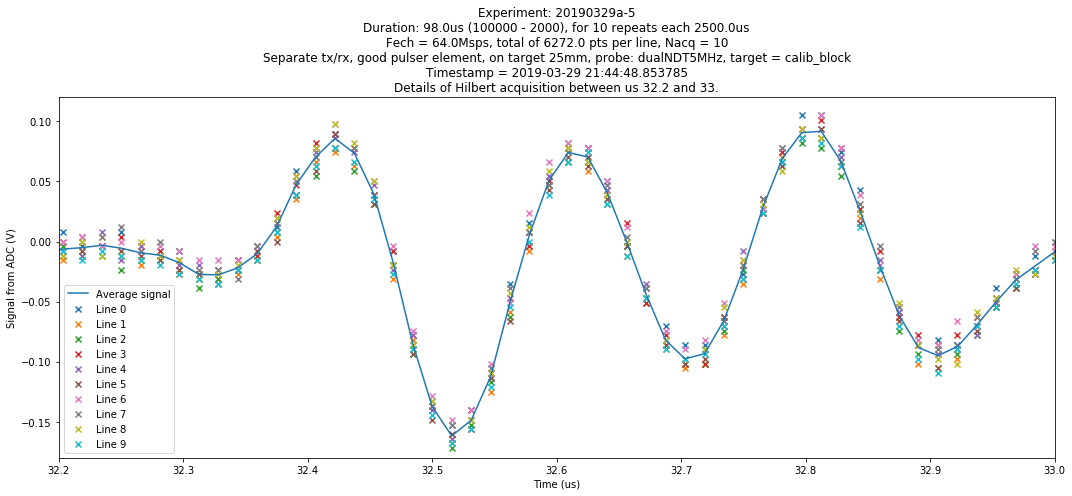

In [28]:
print(clean_image.shape,clean_image.sum(0).shape)
avg_signal = clean_image.sum(0)/10.0

T = z.t[0:6272]



fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
minT,maxT=32.2, 33
for k in range(len(clean_image)):
    ax.scatter(T,clean_image[k],label = "Line "+str(k),marker="x")
ax.plot(T,avg_signal,label = "Average signal")

ax.set_xlim(minT,maxT)
ax.set_ylim(-0.18,0.12)

ax.legend()

DESC = z.create_title_text()+"\nDetails of Hilbert acquisition between us "+str(minT)+" and "+ str(maxT)+"."
plt.title(DESC)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/details_alllines_avg_"+str(minT)+"-"+str(maxT)+"_"+z.iD+"-"+str(z.N)+".jpg"
plt.savefig(file_name)
tag_image(file_name,"matty,dualNDT5MHz", "20190329a", "hilbert,signal", DESC)

plt.show()